My First Kaggle :)


Half of the code here are from
https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook


In the middle I added my own NN solution that can overfit

In [ ]:
import numpy as np
import pandas as pd
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras

In [3]:
train_data = pd.read_csv("./train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("./test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
y = train_data["Survived"]

features = [ "Age", "Pclass", "Embarked","Sex","SibSp", "Parch", "Fare"]
X = train_data[features]
X_test = test_data[features]
column_transformer = ColumnTransformer(
    transformers=[
        ('Bin', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder()),
        ]), [ 'Sex' ,"Pclass", "Embarked"]),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), ['Age', 'SibSp', 'Parch', 'Fare'])
    ],
    remainder='passthrough'  
)

X = column_transformer.fit_transform(X)
display(pd.DataFrame(
    X, 
    columns=column_transformer.get_feature_names_out(),
))
pd.DataFrame(
    column_transformer.transform(X_test),
    columns=column_transformer.get_feature_names_out(),
)

,Bin__Sex_female,Bin__Sex_male,Bin__Pclass_1,Bin__Pclass_2,Bin__Pclass_3,Bin__Embarked_C,Bin__Embarked_Q,Bin__Embarked_S,num__Age,num__SibSp,num__Parch,num__Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.271174,0.125,0.000000,0.014151
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.321438,0.000,0.000000,0.015469
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.434531,0.125,0.000000,0.103644
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.334004,0.000,0.000000,0.025374
887,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.346569,0.125,0.333333,0.045771
889,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058556


,Bin__Sex_female,Bin__Sex_male,Bin__Pclass_1,Bin__Pclass_2,Bin__Pclass_3,Bin__Embarked_C,Bin__Embarked_Q,Bin__Embarked_S,num__Age,num__SibSp,num__Parch,num__Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.428248,0.000,0.000000,0.015282
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.585323,0.125,0.000000,0.013663
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.773813,0.000,0.000000,0.018909
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.334004,0.000,0.000000,0.016908
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.271174,0.125,0.166667,0.023984
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.346569,0.000,0.000000,0.015713
414,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.484795,0.000,0.000000,0.212559
415,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.478512,0.000,0.000000,0.014151
416,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.346569,0.000,0.000000,0.015713


In [10]:
X[1].shape

(12,)

NN parts are from Deep Learning with Python

In [ ]:
num_classes = 1
model = keras.Sequential([
    keras.layers.Input(shape=X[1].shape), 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='sigmoid'),
])
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.RMSprop(learning_rate=20e-4),
    metrics=[
        keras.metrics.BinaryAccuracy(name="acc"),
    ],
)
batch_size = 64
epochs = 300

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
]
history = model.fit(
    X,
    y,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

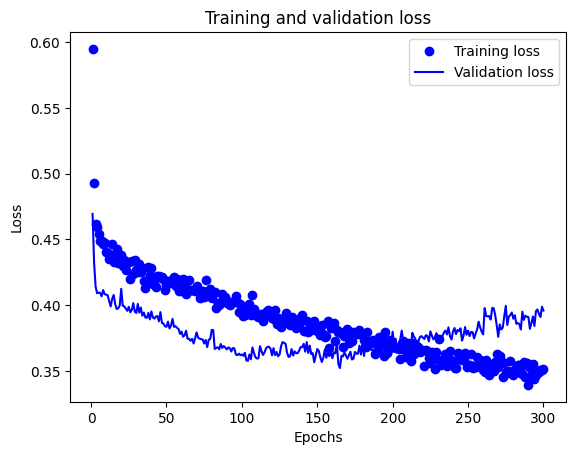

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

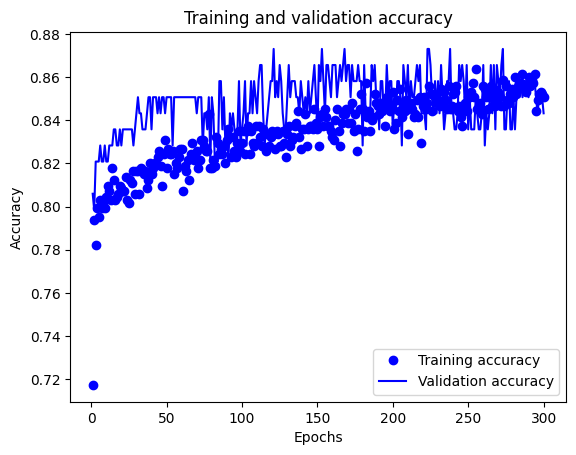

In [13]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [244]:
xtest = column_transformer.transform(X_test)
model = keras.saving.load_model("model_at_epoch_100.keras")

predictions = model.predict(xtest)
print((predictions>0.5).flatten().astype(np.int_))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': (predictions>0.5).flatten().astype(np.int_)})
output.to_csv('submission_1.csv', index=False)
print("Your submission was successfully saved!")

14/14 [==============================] - 0s 16ms/step
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]
Your submission was successfully saved!


Back to initial tutorial

In [14]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Age" ,"Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [15]:

test_data = pd.read_csv("./submission.csv")
test_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
